## Condición de resonancia

Condición de resonancia. Al someter un material magnético a un campo magnético y a ondas de microondas, los espines del material precesan de acuerdo con la ecuación:

\begin{equation}
sin(2 \theta_M) = \frac{2H_R}{4\pi M_{eff}} sin(\theta_M - \theta_H)
\end{equation}

donde $4 \pi M_{eff} = 1.7$, y $H_R$ y $\theta_H$ son dados. Solucione la ecuación para $\theta_M$ mediante el método de bisección y otro de su elección.

A continuación resolvemos la ecuación haciendo uso del método de bisección:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Declaramos el array de ángulos en grados y en radianes
ang = np.arange(0,95,5)
ang_rad = np.radians(ang)

#Array con los datos del campo
H = np.array([2.3179,2.3026,2.3319,2.3653,2.4345,
              2.5137,2.6138,2.7601,2.9222,3.0981,
              3.3646,3.6393,3.9168,4.332,4.6016,
              4.9356,5.2205,5.3954,5.4483])
# Declaración de la función. Se hallan las raíces de esta.
magn = lambda tm, th, hr: np.sin(2*tm) - 2*hr/(1.7) * np.sin(tm-th)

In [4]:
def biseccion(a,b,Th,Hr):
    fm = np.inf
    #Se aplica el método hasta que se encuentra que el valor de la función
    #en el punto es muy cercano a cero.
    while np.abs(fm)>1e-12:
        # Iniciamos evaluando la función en los extremos del intervalo
        fa = magn(a, Th, Hr)
        fb = magn(b, Th, Hr)
        
        # Para aplicar el método es necesario que los extremos del intervalo a analizar
        # mapeen a distinto signo.
        if fa*fb<0:
            # Se saca el punto medio del intervalo y se redefine uno de los extremos.
            m = (a + b)/2
            fm = magn(m, Th, Hr)
            #print(fm)
            if fm*fa<0:
                b = m
            elif fm*fb<0:
                a = m
        elif fa*fb==0:
            if fa==0:
                m = a
            elif fb==0:
                m = b
            fm = magn(m,Th,Hr)
        else:
            print("Los extremos del intervalo tienen el mismo signo al aplicar la función.")
            print("No es posible determinar una raíz por este método.")
            m = np.NaN
            break
    #print(fm)
    return m

In [5]:
Tmb = np.zeros(len(ang_rad))

for i in range(len(ang_rad)):
    a, b = 0, np.pi/2
    Tmb[i] = biseccion(a, b, ang_rad[i], H[i])

Los extremos del intervalo tienen el mismo signo al aplicar la función.
No es posible determinar una raíz por este método.


No es posible determinar la raíz para el último punto por este método.

Ahora determinaremos estas mismas raíces haciendo uso del método de punto fijo:

In [6]:
def Fixed_point(g, p0, Th, Hr, tol=1.0e-10,  Nmax=10000):
    for i in range(Nmax):
        p = g(p0, Th, Hr)
        #print (i, p, np.abs(p-p0)) 
        if (np.abs(p-p0) < tol ): break
        p0 = p
    return p

#Hay dos maneras de despejar la función para aplicar el método
magn_fix = lambda tm, th, hr: 0.5 * np.arcsin(2*hr/(1.7) * np.sin(tm-th))
magn_fix_2 = lambda tm, th, hr: np.arcsin(1.7/(2*hr) * np.sin(2*tm)) + th

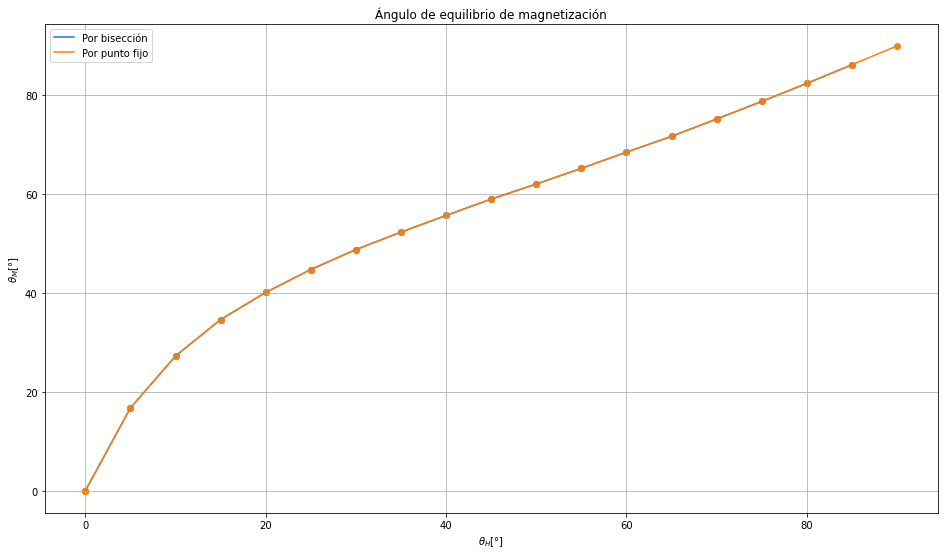

<Figure size 432x288 with 0 Axes>

In [10]:
Tmp = np.zeros(len(ang_rad))

for i in range(len(ang_rad)):
    #El primer despeje da error por tener valores por fuera del dominio de la función.
    Tmp[i] = Fixed_point(magn_fix_2, 0, ang_rad[i], H[i])
    
plt.figure(figsize=(16, 9))
plt.title("Ángulo de equilibrio de magnetización")
plt.xlabel("$\\theta_H [°]$")
plt.ylabel("$\\theta_M [°]$")
plt.scatter(ang, np.degrees(Tmb))
plt.plot(ang, np.degrees(Tmb), label = "Por bisección")

plt.scatter(ang, np.degrees(Tmp))
plt.plot(ang, np.degrees(Tmp), label = "Por punto fijo")

plt.legend()
plt.grid()
plt.show()
plt.savefig("Magnetización.png")